<a href="https://colab.research.google.com/github/dhanashrihogale23/dhanashri_23-Oasisinfobyte_project/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df=pd.read_csv("Unemployment in India.csv")

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.isnull().sum() # returns the count of null values in each column. Null values typically represent missing or undefined data.

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.isna().sum() #returns the count of NA values in each column. NA values can include both null values and other types of missing values.

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
# dropping null values
df = df.dropna()

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
df.shape

(740, 7)

In [ ]:
df.duplicated().sum()

0

For better understanding I renamed the dataset columns

In [ ]:
# rename all columns name
df.columns = ['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'],
      dtype='object')

In [ ]:
df.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [ ]:
# State with highest unemployment
                 #it will give you the value that appears most frequently in the 'month',column of the dataset
df['Region'].value_counts().idxmax()  #idxmax() returns the index (the value) with the highest count


'Andhra Pradesh'

In [ ]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [ ]:
#Region with lowest unemployment
df['Region'].value_counts().idxmin()

'Chandigarh'

In [ ]:
# month of employment
# These code converts the 'Date' column to a datetime type,extracts the match as an integer, and adds  a new column
# with the corresponding three-letter month abbreviation.

import datetime as dt #This line imports the datetime module,which provides classes and functions for working with dates and times.
import calendar       #This line imports the calendar module,which includes various functions related to calendars,such as retrieving month names.

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)                    #This line converts the 'Date' column in the Dataframe df to a datetime data type using the pd.to_datetime()function from the pandas library.The dayfirst=True parameter specifies that the date format,where the day appears before the month.
df['month_int'] = df['Date'].dt.month                                    #This line extracts the match component from the 'Date'column and assigns it to a new column called 'month_int' in the Dataframe df.The dt accessor allows access to various date components ,and .month returns the month as an integer.
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])    #This line creates a new column called 'month' in the Dataframe df by applying a Lambda function to the 'month_int'column.The lambda function uses calender.month_abbr[x] to receive the three-letter abbrevatation of the month based on the integer value in 'month_int'.The resulting abbrevatiom are stored in month column.

In [ ]:
#month with highest unemployment
df['month'].value_counts().idxmax()

'May'

In [ ]:
df['month'].value_counts().idxmin()

'Apr'

In [ ]:
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


In [ ]:
df.drop(columns=['Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [ ]:
# top 10 states with highest unemployment
df1 = df[['Region','Estimated Unemployment Rate']].groupby('Region').sum().sort_values('Estimated Unemployment Rate',ascending=False)

In [ ]:
df1.head(10)

,Estimated Unemployment Rate
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, 'Number of people unemployment %')

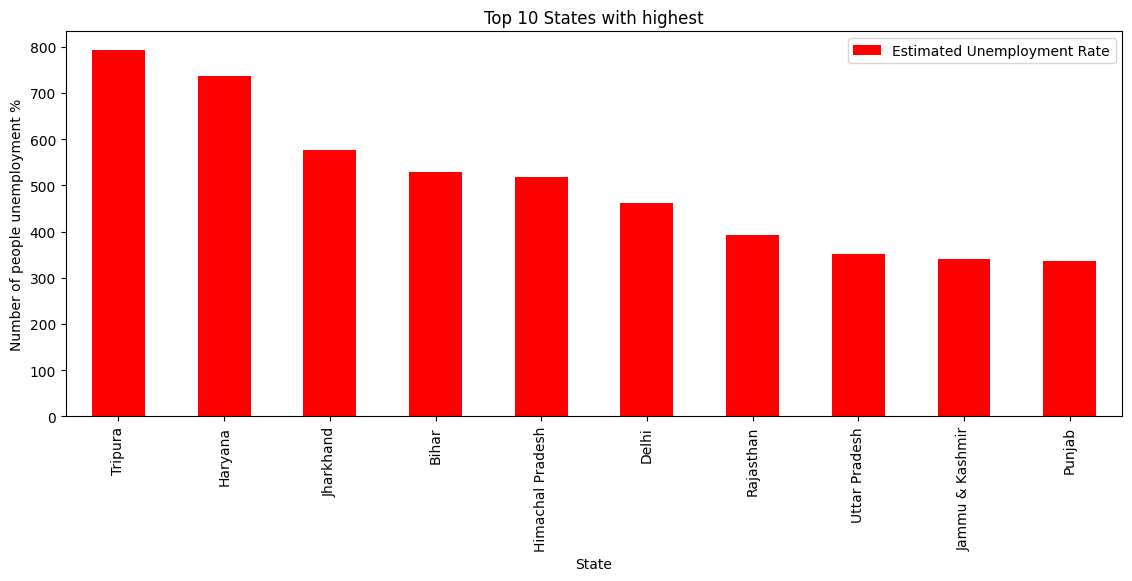

In [ ]:
#visualisation
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df1[:10].plot(kind='bar',color='red',figsize=(30,5),ax=ax0)
ax0.set_title('Top 10 States with highest')
ax0.set_xlabel('State')
ax0.set_ylabel('Number of people unemployment %')

In [ ]:
# top 10 states with highest unemployment
df2 = df[['month','Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate',ascending=False)
df2.head(10)

,Estimated Unemployment Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Number of people unemployment %')

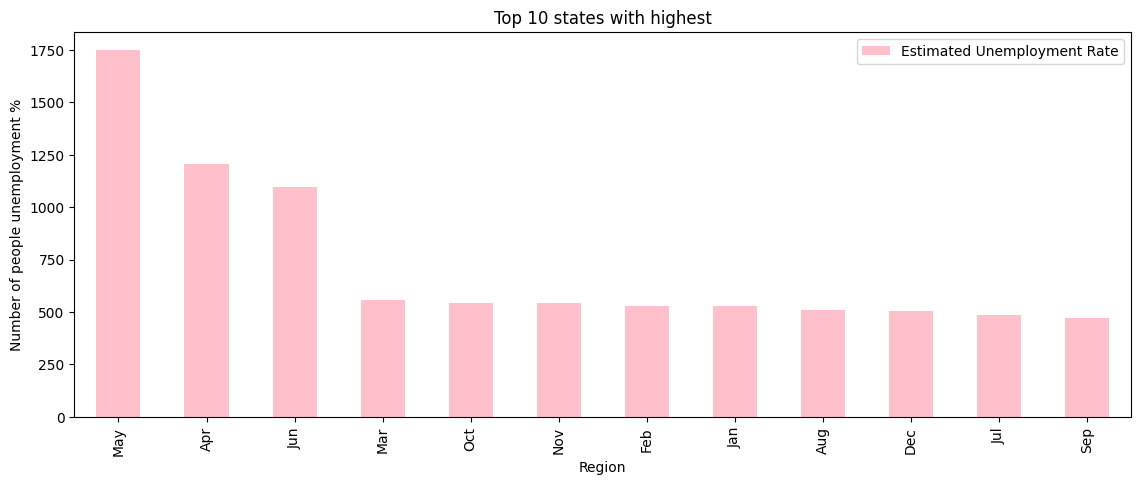

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2[:12].plot(kind='bar',color='pink',figsize=(30,5),ax=ax0)
ax0.set_title('Top 10 states with highest')
ax0.set_xlabel('Region')
ax0.set_ylabel('Number of people unemployment %')

In [ ]:
# visualize labor participation rate & unemployment rate in each month
import plotly.graph_objects as go
df_EEE = df.groupby(['month'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
df_EEE= pd.DataFrame(df_EEE).reset_index()
month = df_EEE.month
unemployment_rate = df_EEE['Estimated Unemployment Rate']
labor_participation_rate = df_EEE['Estimated Labour Participation Rate']

fig = go.Figure()       #This module Provides the core functionality for creating interaction piots and visualization usuage
fig.add_trace(go.Bar(x = month, y = unemployment_rate, name = 'unemployment_Rate')) #The fig.add_trace()
fig.add_trace(go.Bar(x = month, y = labor_participation_rate, name = 'Labor Participation Rate')) #The trace object can

fig.update_layout(title='Unemployment Rate and Labor Participation Rate',xaxis={'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']})
fig.show()












In [ ]:
# state wise Estimated Employed(Estimated Employed --> It represent countn of people who have jobs or are engaged in some form )
df3 = df[['Region','Estimated Employed']].groupby('Region').sum().sort_values('Estimated Employed',ascending=False)
df3

,Estimated Employed
Region,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Number of Estimated Employed')

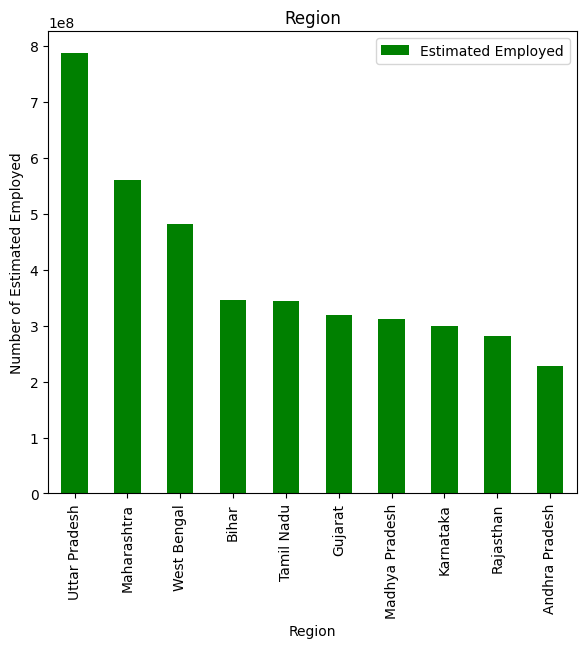

In [ ]:
# state wise Estimated Employed visualization

df3 = df[['Region','Estimated Employed']].groupby('Region').sum().sort_values('Estimated Employed',ascending=False)
df3.head()
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)       # The second subplot (ax1) will be positioned in the second column

#Employed
df3[:10].plot(kind='bar',color='green',figsize=(15,6),ax=ax1)
ax1.set_title('Estimated Employed people in each Region')
ax1.set_title('Region')
ax1.set_ylabel('Number of Estimated Employed')

In [ ]:
# Estimated Unemployed  Rate state wise(Estimated Unemployment Rate(%) --> It is ccalculated by dividing the number of unemployed individuals by the total labor
                                            #  Estimated Unemployment Rate(%) = (Number of Unemployed / Labor )

df3_a= df[['Region','Estimated Unemployment Rate']].groupby('Region').sum().sort_values('Estimated Unemployment Rate',ascending=False)
df3_a

,Estimated Unemployment Rate
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, 'Estimated Unemployment Rate (in %)')

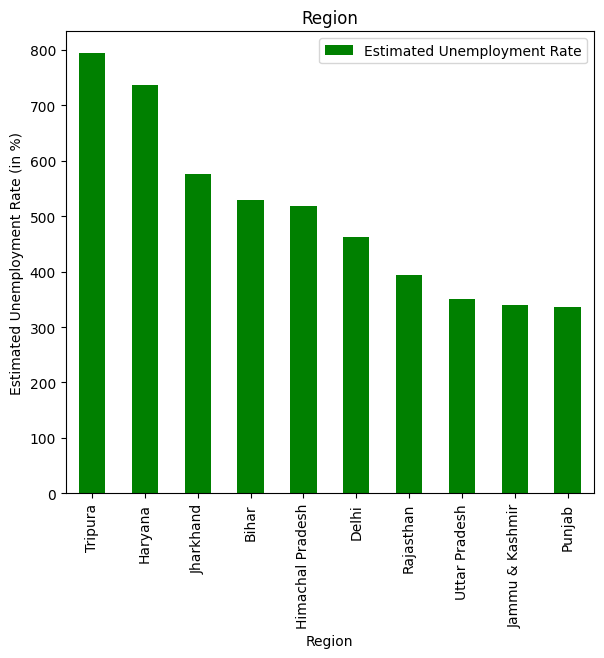

In [ ]:
# Estimated Unemployed Ratewise visualization

df3_a =df[['Region','Estimated Unemployment Rate']].groupby('Region').sum().sort_values('Estimated Unemployment Rate',ascending=False)
df3_a.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

df3_a[:10].plot(kind='bar',color='green',figsize=(15,6),ax=ax1)
ax1.set_title('Estimated Unemployed rate in each state')
ax1.set_title('Region')
ax1.set_ylabel('Estimated Unemployment Rate (in %)')









In [ ]:
df4 = df[['month','Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed',ascending=False)
df4

,Estimated Employed
month,
Jun,766717078.0
May,699995530.0
Jan,406899254.0
Feb,403011803.0
Sep,402452126.0
Oct,401411032.0
Nov,400051335.0
Jul,399838967.0
Aug,399610205.0


Text(0, 0.5, 'Number of Estimated Employed')

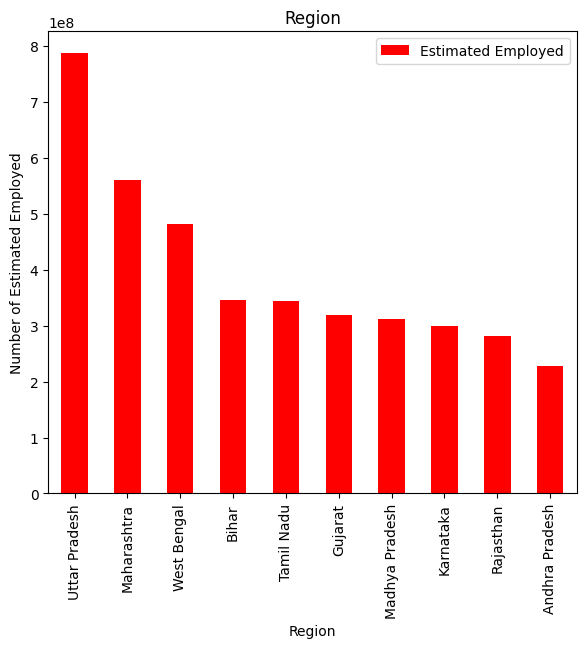

In [ ]:
# state wise Estimated Employed visualization

df4 = df[['Region','Estimated Employed']].groupby('Region').sum().sort_values('Estimated Employed',ascending=False)
df4.head()
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)       # The second subplot (ax1) will be positioned in the second column

#Employed
df4[:10].plot(kind='bar',color='red',figsize=(15,6),ax=ax1)
ax1.set_title('Estimated Employed people in each Region')
ax1.set_title('Region')
ax1.set_ylabel('Number of Estimated Employed')

In [ ]:
# barplot unemployment rate(monthly)

fig = px.bar(df,x='Region',y='Estimated Unemployment Rate',animation_frame='month',color='Region',title='Unemployment Rate(Region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000
fig.show()